<a href="https://colab.research.google.com/github/mariajuliapessoa/Dataset-de-Clustering/blob/main/MARIA_JULIA_PESSOA_CUNHA_Pr%C3%A1tica_03_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prática 03 - Clustering

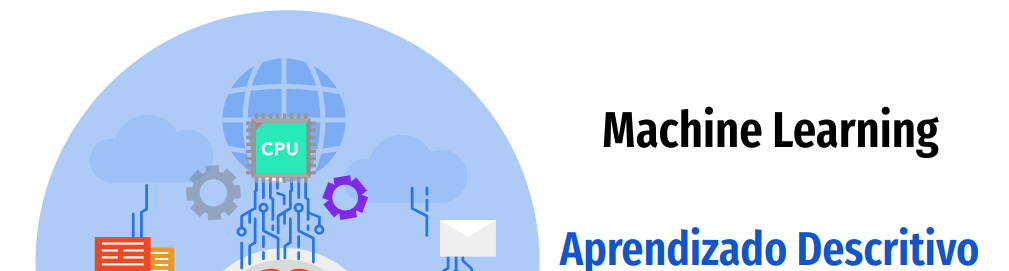

**Pessoa estudante**:  INSIRA SEU NOME AQUI! Maria Júlia Pessoa(mjpc@cesar.school) Rfael Abreu de Carvalho (rac@cesar.school)

**Objetivo da Prática**

```
O objetivo desta prática é construir um técnica de clusterização baseada no K-means para o dataset Iris. Além disso, vamos avaliar baseado em métricas de clusterização.
```

**Instruções para a prática.**

1. Importar o dataset da célula descrita neste notebook.

2. Seuir as instruções detalhadas abaixo (9 etapas).

3. **Submeter no Classroom até a data limite. Após o prazo limite, punição de 10 pontos por dia de atraso.**

4. Use o chatGPT com moderação. Ele não acerta sempre não viu? 😅



![img](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

O conjunto de dados flor Iris, também conhecido como conjunto de dados Iris ou conjunto de dados Iris de Fisher, é um conjunto de dados frequentemente usado em aprendizado de máquina e estatística como exemplo para técnicas de classificação, clusterização e visualização de dados. Este conjunto de dados foi introduzido pela primeira vez pelo estatístico e biólogo britânico Sir Ronald Fisher em 1936 em seu artigo "The Use of Multiple Measurements in Taxonomic Problems" como um exemplo de análise discriminante linear.

O conjunto de dados consiste em amostras de três espécies diferentes de flores Iris:
- Iris setosa
- Iris virginica
- Iris versicolor.

Para cada amostra, são fornecidas quatro características: o comprimento e a largura das sépalas (parte externa da flor) e o comprimento e a largura das pétalas (parte interna da flor). Essas características foram medidas em centímetros.

Aqui está uma descrição mais detalhada das características:

- Comprimento da Sépala (em centímetros)
- Largura da Sépala (em centímetros)
- Comprimento da Pétala (em centímetros)
- Largura da Pétala (em centímetros)
- Espécie da flor Iris (Iris setosa, Iris virginica ou Iris versicolor)

Este conjunto de dados é amplamente disponível e é considerado um padrão na comunidade de aprendizado de máquina para testar e validar algoritmos e técnicas. Ele também é frequentemente usado em tutoriais e cursos introdutórios de aprendizado de máquina devido à sua simplicidade e clareza

Nesta base, vamos tentar agrupar as flores por informações do tamanho de suas pétalas

1. Carregue a base e visualize algumas informações sobre a mesma [**5 Pontos**]
- head, info, describe

2. Selecione apenas as características relacionadas às pétalas [**5 Pontos**]
- 'petal length (cm)', 'petal width (cm)'

3. Plote a dispersão dessas características [**5 Pontos**]
- plt.scatter

4. Padronize os dados (não é recomendado utilizar técnicas não-lineares) [**15 Pontos**]
- Avalie qual método utilizar de acordo com as técnicas vistas
- Plote novamente a dispersão

5. Crie e treine modelos KMeans com valores de k que achar válido (de acordo com a visualização) [**15 Pontos**]

6. Plote a dispersão juntamente com os kmeans.cluster_centers_ e cores correspondentes aos grupos [**10 Pontos**]
- `kmeans.labels_` pode ser utilizado como cores

7. Analise o melhor valor de K utilizando o método Elbow baseado na inércia
kmeans.inertia_ [**15 Pontos**]

8. Analise o melhor valor de K utilizando o Silhouette Score
silhouette_score [**15 Pontos**]

9. Baseando-se no melhor k encontrado: [**15 Pontos**]
- compare o resultado obtido com as espécies reais visualmente
- descreva os representantes dos grupos (centróides) e cada um dos clusters encontrados com base em suas características
- qual(is) técnica(s) poderiam ser utilizadas caso fosse necessário encontrar outliers? Implemente e demonstre visualmente.

## Parte 1 - Importação do Dataset

**Pontuação: Sem pontuação nesta etapa.**

Seguir a célula abaixo!

In [ ]:
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['species'] = iris.target

Adicionamos a coluna Species para representar as diferentes espécies de íris, sendo:

0: Setosa
1: Versicolor
2: Virginica

**1. Mostrando informações sobre o dataset**

In [ ]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Verificando se há valores nulos no dataset

In [ ]:
print(iris_df.isnull().any())

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
species              False
dtype: bool


**2. Selecionando apenas as características relacionadas às pétalas**

In [ ]:
# Selecionar apenas as características relacionadas às pétalas
petal_data = iris_df[['petal length (cm)', 'petal width (cm)']]
print(petal_data.head())

   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2


**3. Plotando a dipersão das características das pétalas**

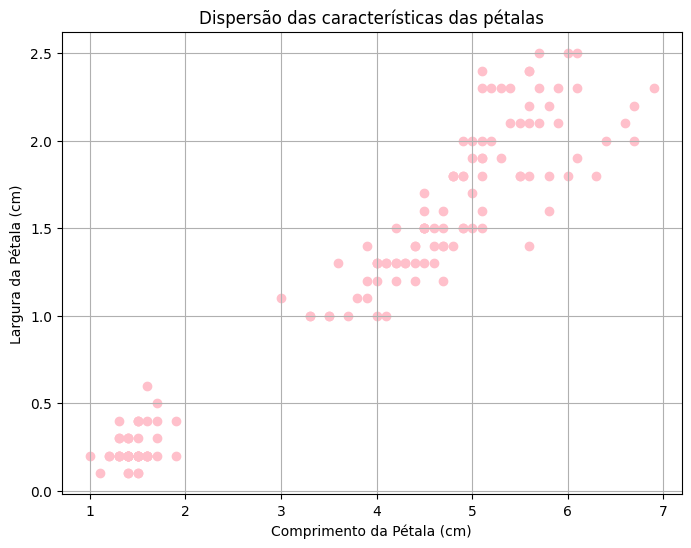

In [ ]:
import matplotlib.pyplot as plt

# Plotar a dispersão das características das pétalas
plt.figure(figsize=(8, 6))
plt.scatter(petal_data['petal length (cm)'], petal_data['petal width (cm)'], color='pink')
plt.title('Dispersão das características das pétalas')
plt.xlabel('Comprimento da Pétala (cm)')
plt.ylabel('Largura da Pétala (cm)')
plt.grid(True)
plt.show()

**4. Padronizando os dados**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Padronizando os dados
scaler = StandardScaler()
petal_scaled = scaler.fit_transform(petal_data)

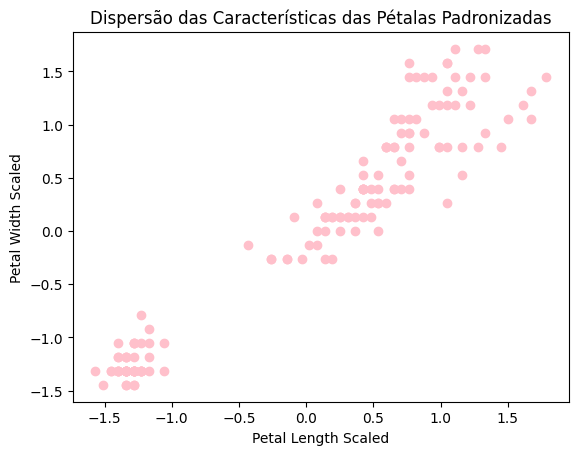

In [ ]:
# Plotando a dispersão dos dados padronizados
plt.scatter(petal_scaled[:, 0], petal_scaled[:, 1], c='pink')
plt.xlabel('Petal Length Scaled')
plt.ylabel('Petal Width Scaled')
plt.title('Dispersão das Características das Pétalas Padronizadas')
plt.show()

**5. Criando e treinando modelos KMeans com valores de k que achar válido**

In [ ]:
from sklearn.cluster import KMeans

# Lista p armazenar os modelos KMeans
k_values = range(1, 6)
models = [KMeans(n_clusters=k).fit(petal_scaled) for k in k_values]

# Mostrando os centróides
for model in models:
    print("\n")
    print(f"Centroids for k={model.n_clusters}: {model.cluster_centers_}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8



Centroids for k=1: [[-2.27373675e-15 -8.81517082e-16]]


Centroids for k=2: [[-1.30498732 -1.25489349]
 [ 0.65249366  0.62744675]]


Centroids for k=3: [[-1.30498732 -1.25489349]
 [ 0.3058728   0.16541778]
 [ 1.02799959  1.12797813]]


Centroids for k=4: [[ 0.76459173  0.71848526]
 [-1.30498732 -1.25489349]
 [ 0.22415599  0.09803464]
 [ 1.19009152  1.34645099]]


Centroids for k=5: [[ 0.07616215 -0.02544889]
 [ 1.17426124  1.38564813]
 [-1.30498732 -1.25489349]
 [ 0.51856784  0.34214617]
 [ 0.86901955  0.84790204]]


Atribuimos a `k_values` uma lista que com clusters de 1 a 5. Em seguida, se cria a lista chamada `models`, onde cada elemento é um modelo KMeans treinado com um número específico de clusters, usando os dados já padronizados.
Para cada modelo, imprimimos os centróides dos clusters encontrados durante o treinamento. Os centróides representam os pontos médios de cada cluster no espaço de características. Como saída temos o número de clusters `k` para o modelo específico e os valores dos centróides para cada dimensão do espaço de características.


**6. Plotando a dispersão juntamente com os kmeans.cluster_centers_ e cores correspondentes aos grupos**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


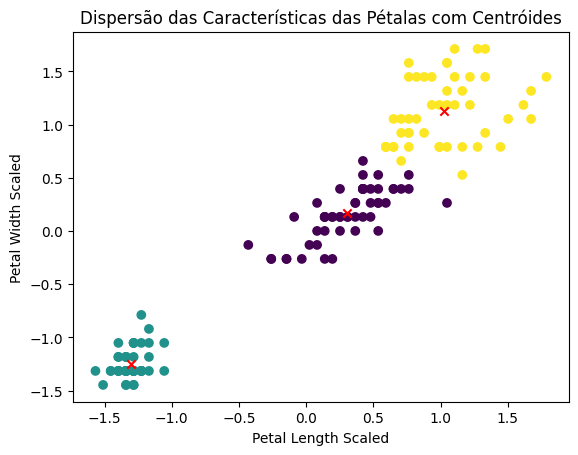

In [ ]:
# Selecionando um modelo (exemplo com k=3)
model = KMeans(n_clusters=3)
model.fit(petal_scaled)
plt.scatter(petal_scaled[:, 0], petal_scaled[:, 1], c=model.labels_)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('Petal Length Scaled')
plt.ylabel('Petal Width Scaled')
plt.title('Dispersão das Características das Pétalas com Centróides')
plt.show()

Criamos o kmeans, agrupando os dados em 3 clusters. Em seguida, chamamos a função `fit()` com os dados padronizados para treinar o modelo.

**7. Analise o melhor valor de K utilizando o método Elbow baseado na inércia kmeans.inertia**

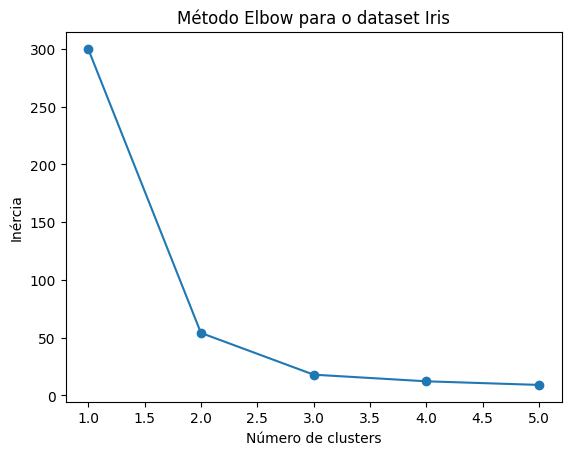

In [ ]:
inertias = [model.inertia_ for model in models]

plt.plot(k_values, inertias, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.title('Método Elbow para o dataset Iris')
plt.show()

**8. Analise o melhor valor de K utilizando o Silhouette Score silhouette_score**

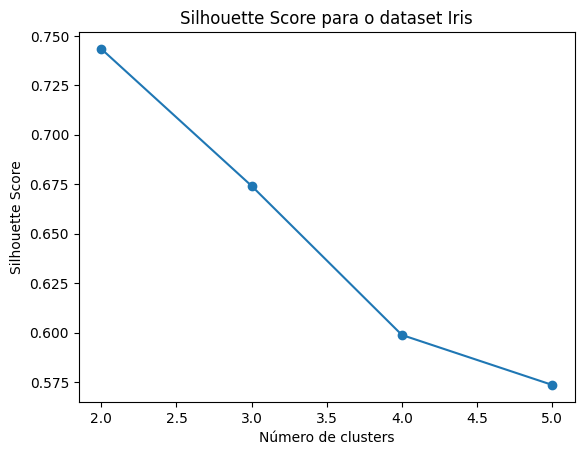

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(petal_scaled, model.labels_) for model in models[1:]]

plt.plot(k_values[1:], silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para o dataset Iris')
plt.show()

**9. Baseando-se no melhor k encontrado:**

compare o resultado obtido com as espécies reais visualmente
descreva os representantes dos grupos (centróides) e cada um dos clusters encontrados com base em suas características
qual(is) técnica(s) poderiam ser utilizadas caso fosse necessário encontrar outliers? Implemente e demonstre visualmente.

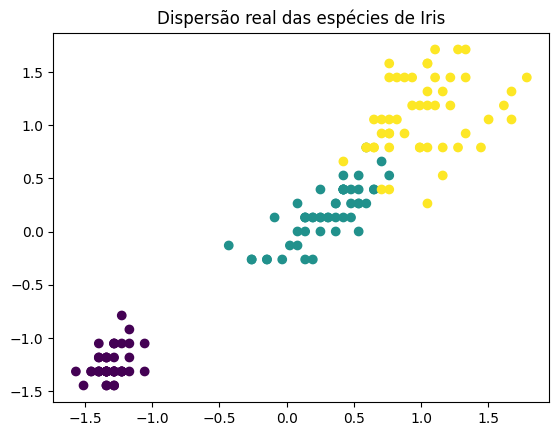

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroids:
 [[ 0.3058728   0.16541778]
 [-1.30498732 -1.25489349]
 [ 1.02799959  1.12797813]]


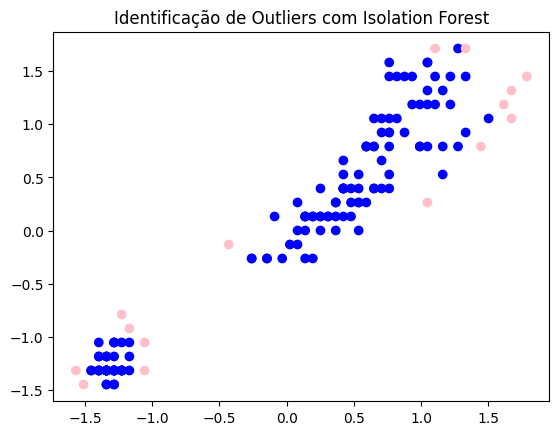

In [ ]:
import numpy as np

# Comparação visual com as espécies reais
plt.scatter(petal_scaled[:, 0], petal_scaled[:, 1], c=iris['target'])
plt.title('Dispersão real das espécies de Iris')
plt.show()

# Melhor k baseado nos resultados anteriores (exemplo k=3)
best_k = 3
best_model = KMeans(n_clusters=best_k).fit(petal_scaled)
print("Centroids:\n", best_model.cluster_centers_)

# Para encontrar outliers, podemos usar o Isolation Forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1)
outliers = iso_forest.fit_predict(petal_scaled)

# Plotando pontos normais e outliers
colors = np.where(outliers == 1, 'blue', 'pink')
plt.scatter(petal_scaled[:, 0], petal_scaled[:, 1], c=colors)
plt.title('Identificação de Outliers com Isolation Forest')
plt.show()
